(176, 208, 176, 1)
NZ:  1667264
out of  6443008
NZ in procent:  25.8771058487
max value  3216
r =  18 154
c =  18 188
z =  7 151
NZ:  1667264
out of  3896064
NZ in procent:  42.7935475393
max value  3216


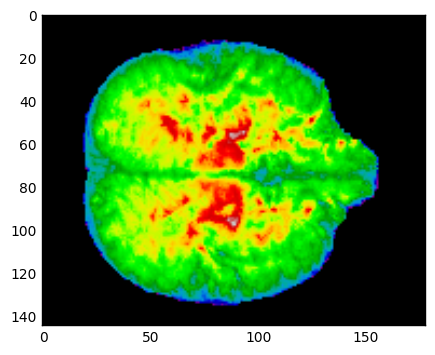

img2d size:  (144, 178)
imgCUT2d size:  (48, 59)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


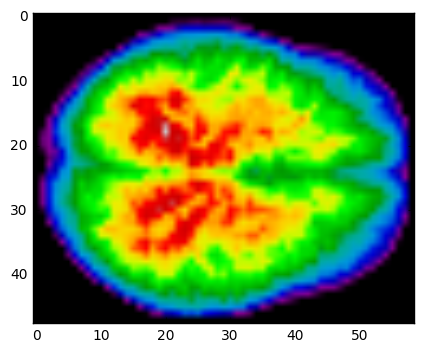

img2d size:  (144, 178)
imgCUT2d size:  (72, 89)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:88: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


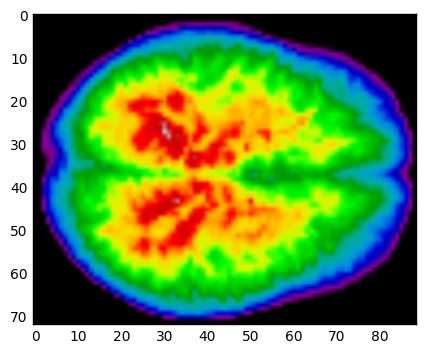

In [4]:
%matplotlib inline
from __future__ import division
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = '/home/igor/ML/data_1/set_train/'
proj_path = '/home/igor/ML/data_1/'
example_filename = os.path.join(data_path, 'train_2.nii')

img = nib.load(example_filename).get_data()

print img.shape #(176, 208, 176, 1)

nz = np.count_nonzero(img)
total = img.shape[0] * img.shape[1] * img.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total
print 'max value ', np.amax(img) 

r = np.any(img, axis=(1, 2))
c = np.any(img, axis=(0, 2))
z = np.any(img, axis=(0, 1))

rmin, rmax = np.where(r)[0][[0, -1]]
cmin, cmax = np.where(c)[0][[0, -1]]
zmin, zmax = np.where(z)[0][[0, -1]]

print 'r = ', rmin, rmax
print 'c = ', cmin, cmax
print 'z = ', zmin, zmax

img = np.sum(img, axis=3)     # to remove the '4th' dimension which is basically intesity

offset = 4
img = img[rmin-offset:rmax+offset,cmin-offset:cmax+offset,zmin-offset:zmax+offset]

nz = np.count_nonzero(img)
total = img.shape[0] * img.shape[1] * img.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total
print 'max value ', np.amax(img) 



#imgplot0 = plt.imshow(np.mean(img, axis=0), cmap="spectral")     # sa strane
#imgplot1 = plt.imshow(np.sum(img, axis=1), cmap="spectral")    # od pozadi
imgplot2 = plt.imshow(np.median(img, axis=2), cmap="spectral")   # od gore
plt.show()


img2d = np.sum(img, axis=2)
print 'img2d size: ', img2d.shape
iEdge = img2d.shape[0] % 3
jEdge = img2d.shape[1] % 3
imgCUT2d = np.zeros(((img2d.shape[0] - iEdge)/3, (img2d.shape[1] - jEdge)/3))
print 'imgCUT2d size: ', imgCUT2d.shape
countI = -1
#countJ = -1
for i in range(img2d.shape[0]):
    if i % 3 == 1 and i < img2d.shape[0] - iEdge - 2:
        countI += 1
        countJ = -1
        for j in range(img2d.shape[1]):
            if j % 3 == 1 and j < img2d.shape[1] - jEdge -2:
                countJ +=1
                result = np.sum(img2d[i-1:i+1,j-1:j+1]) / 9
                #try:
                imgCUT2d[countI][countJ] = result
                #print 'countI, countJ = ', countI,' ', countJ
                #except IndexError:
                    #print i, j 
                    
imgplot2CUT = plt.imshow(imgCUT2d, cmap="spectral")   # od gore
plt.show()



img2d = np.sum(img, axis=2)
print 'img2d size: ', img2d.shape
iEdge = img2d.shape[0] % 2
jEdge = img2d.shape[1] % 2
imgCUT2d = np.zeros(((img2d.shape[0] - iEdge)/2, (img2d.shape[1] - jEdge)/2))
print 'imgCUT2d size: ', imgCUT2d.shape
countI = -1
#countJ = -1
for i in range(img2d.shape[0]):
    if i % 2 == 1 and i < img2d.shape[0] - iEdge - 1:
        countI += 1
        countJ = -1
        for j in range(img2d.shape[1]):
            if j % 2 == 1 and j < img2d.shape[1] - jEdge -1:
                countJ +=1
                result = np.sum(img2d[i-1:i,j-1:j]) / 4
                #try:
                imgCUT2d[countI][countJ] = result
                #print 'countI, countJ = ', countI,' ', countJ
                #except IndexError:
                    #print i, j 
                    
imgplot2CUT = plt.imshow(imgCUT2d, cmap="spectral")   # od gore
plt.show()

targets_file = open(os.path.join(proj_path, 'targets.csv'), 'r')

for i in range(1,50):
	img_file = os.path.join(data_path, 'train_'+str(i)+'.nii')

	img = nib.load(img_file)

	age = targets_file.readline()

	#print age



In [30]:
%matplotlib inline
from __future__ import division
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = '/home/igor/ML/project1/set_train/'
proj_path = '/home/igor/ML/project1/'
example_filename = os.path.join(data_path, 'train_2.nii')

img = nib.load(example_filename).get_data()

print img.shape #(176, 208, 176, 1)

nz = np.count_nonzero(img)
total = img.shape[0] * img.shape[1] * img.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total
print 'max value ', np.amax(img) 

r = np.any(img, axis=(1, 2))
c = np.any(img, axis=(0, 2))
z = np.any(img, axis=(0, 1))

rmin, rmax = np.where(r)[0][[0, -1]]
cmin, cmax = np.where(c)[0][[0, -1]]
zmin, zmax = np.where(z)[0][[0, -1]]

print 'r = ', rmin, rmax
print 'c = ', cmin, cmax
print 'z = ', zmin, zmax

img = np.sum(img, axis=3)     # to remove the '4th' dimension which is basically intesity

# crop the image with given offset
offset = 4
img = img[rmin-offset:rmax+offset,cmin-offset:cmax+offset,zmin-offset:zmax+offset]




#img2d = np.sum(img, axis=2)
print 'img size: ', img2d.shape
iEdge = img.shape[0] % 2
jEdge = img.shape[1] % 2
kEdge = img.shape[2] % 2
imgCUT = np.zeros(((img.shape[0] - iEdge)/2, (img.shape[1] - jEdge)/2, (img.shape[2] - kEdge)/2))
print 'imgCUT size: ', imgCUT.shape
countI = -1
#countJ = -1
for i in range(img.shape[0]):
    if i % 2 == 1 and i < img.shape[0] - iEdge - 1:
        countI += 1
        countJ = -1
        for j in range(img.shape[1]):
            if j % 2 == 1 and j < img.shape[1] - jEdge -1:
                countJ +=1
                countK = -1
                for k in range(img.shape[2]):
                    if k % 2 == 1 and k < img.shape[2] - kEdge -1:
                        countK +=1
                        result = np.sum(img[i-1:i, j-1:j, k-1:k]) / 8
                        imgCUT[countI][countJ][countK] = result
                        
                        
nz = np.count_nonzero(imgCUT)
total = imgCUT.shape[0] * imgCUT.shape[1] * imgCUT.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total

(176, 208, 176, 1)
NZ:  1667264
out of  6443008
NZ in procent:  25.8771058487
max value  3216
r =  18 154
c =  18 188
z =  7 151
img size:  (144, 178)
imgCUT size:  (72, 89, 76)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NZ:  212197
out of  487008
NZ in procent:  43.5715635061


Populating the interactive namespace from numpy and matplotlib
size onlyfiles:  1
shape of image begin:  (176, 208, 176)
max intensity:  3908


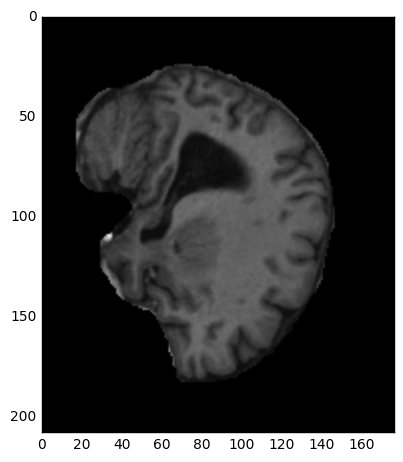

white: imgSmooth[seed]:  667.09483562
  imgSmooth[new_seed]:  1393.4911672
gray: imgSmooth[seed]:  1237.89970865
  imgSmooth[new_seed]:  1074.55742917
  imgSmooth[new_seed]:  1081.89096996
  imgSmooth[new_seed]:  1118.03235949
  imgSmooth[new_seed]:  1175.43190356
  imgSmooth[new_seed]:  1222.9688156
  imgSmooth[new_seed]:  1237.89970865
  imgSmooth[new_seed]:  1218.96471182
  imgSmooth[new_seed]:  1182.73879885
  imgSmooth[new_seed]:  1156.89705946
  imgSmooth[new_seed]:  1152.61997302
  imgSmooth[new_seed]:  1162.19677415
  imgSmooth[new_seed]:  1394.63046947
  imgSmooth[new_seed]:  1242.796158
  imgSmooth[new_seed]:  1145.56791893
  imgSmooth[new_seed]:  1160.54272534
  imgSmooth[new_seed]:  1201.30693256
  imgSmooth[new_seed]:  1237.89970865
  imgSmooth[new_seed]:  1220.40172818
  imgSmooth[new_seed]:  1155.35728455
  imgSmooth[new_seed]:  1082.92842258
  imgSmooth[new_seed]:  1028.50578616
  imgSmooth[new_seed]:  999.34310507
  imgSmooth[new_seed]:  1274.23660896
  imgSmooth[new_s

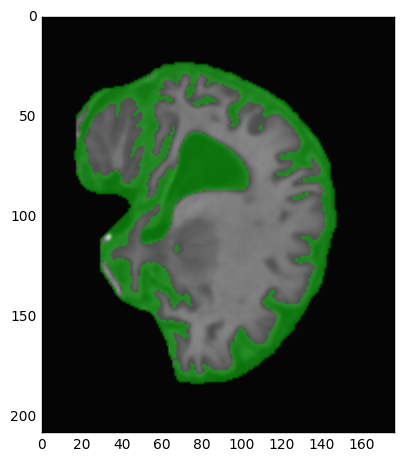

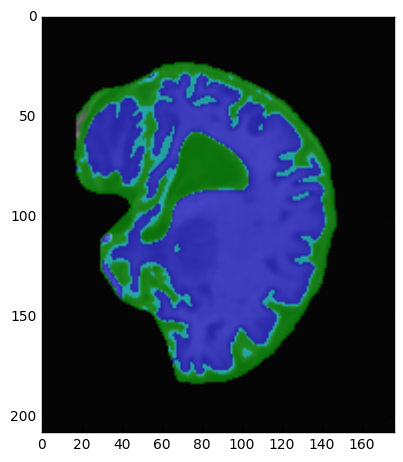

endImgG:


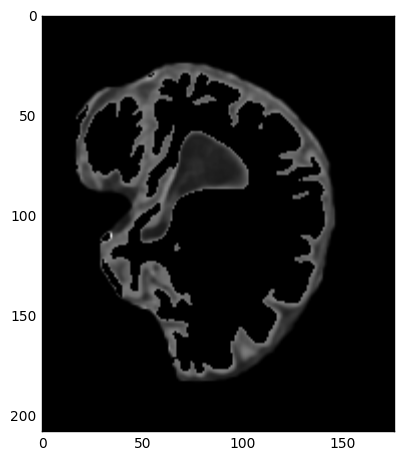

endImgW:


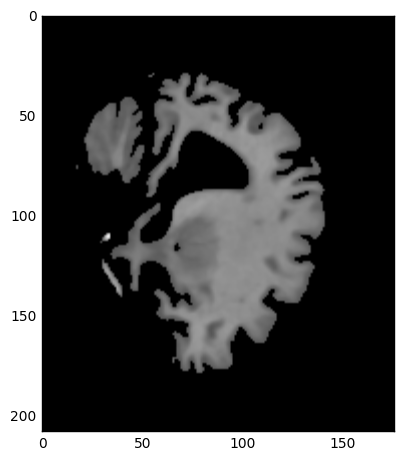

shape of map end:  (176, 208, 176)
endImgG mean:  528.820849637
endImgG min:  -11.0451849786
endImgG max:  2375.19515942
endImgW mean:  1181.01013745
endImgW min:  695.173966703
endImgW max:  2987.07803568
endImg saved to:  /home/igor/ML/data_2/set_train/train_122.nii


In [4]:
# HERE DO WHITE - GRAY SEGMENTATION for each of the images and save these files
# https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/

import os
import numpy as np
import gc
import SimpleITK
import nibabel as nib
import matplotlib.pyplot as plt
from scipy import sparse, io
%pylab inline

# all images have identical boundaries (checked)
rmin = 18
rmax = 154
cmin = 18
cmax = 188
zmin = 7
zmax = 151
offset = 0

mode = 'train'

# help function for visulazing
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()
    
def nda_show(nda, title=None, margin=0.05, dpi=40 ):
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()    



# Directory where the DICOM files are being stored (in this
# case the 'MyHead' folder). 
pathData = '/home/igor/ML/data_2/set_'+mode+'/'
pathOutput = '/home/igor/ML/data_2/set_'+mode+'_gray_matter_maps/'

# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 55

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelWhiteMatter = 2
labelGrayMatter = 1

from os.path import isfile, join
#onlyfiles = [f for f in os.listdir(pathData) if isfile(join(pathData, f)) and f.endswith('.nii')]
onlyfiles = [f for f in os.listdir(pathData) if isfile(join(pathData, f)) and f.endswith('_122.nii')]

print 'size onlyfiles: ', len(onlyfiles)
#itkImages = []
# to this only for part of images athe time
for f in onlyfiles:
    full_f = join(pathData, f)
    ndImg = nib.load(full_f).get_data()
    ndImg = np.sum(ndImg, axis=3)       # sum upon the 4th axis so that we reduce the img to 3d
    print 'shape of image begin: ', ndImg.shape
    print 'max intensity: ', np.max(ndImg)
    itkImg = SimpleITK.GetImageFromArray(ndImg)
    
    #itkImages.append(itkImg)
    visImg = itkImg[:,:,idxSlice]
    sitk_show(visImg)
    
    # Smmoth the image (because it is noisy now)
    # https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1CurvatureFlowImageFilter.html#details
    imgSmooth = SimpleITK.CurvatureFlow(image1=itkImg,
                                    timeStep=0.125,
                                    numberOfIterations=5)
    visImg = imgSmooth[:,:,idxSlice]
    
    ndaVis = SimpleITK.GetArrayFromImage(visImg)
    #print 'intensity mean: ', np.mean(ndaVis[np.nonzero(ndaVis)])
    #print 'intensity std: ', np.std(ndaVis[np.nonzero(ndaVis)])
    #print 'intensity NZ: ', np.count_nonzero(ndaVis) / (ndaVis.shape[0]* ndaVis.shape[1])
    #print 'intensity min: ', np.min(ndaVis[np.nonzero(ndaVis)])
    #print 'intensity max: ', np.max(ndaVis)
    
    #for i in range(ndaVis.shape[0]):
    #    for j in range(ndaVis.shape[1]):
    #        if ndaVis[i][j] < 840:
    #            ndaVis[i][j] = 0
    
    
    #nda_show(ndaVis)
    # Segmentation with the ConnectedThreshold filter
    white_l_bound = 800
    white_u_bound = 4500
    white_lstSeeds = [(100,75,55)]
    for iter_, seed in enumerate(white_lstSeeds):
        print 'white: imgSmooth[seed]: ', imgSmooth[seed]
        if imgSmooth[seed] < white_l_bound or imgSmooth[seed] > white_u_bound:
            # for each of 3 dimension
            for i in range(3):
                break_in = False
                # for -1 and +1
                for j in range(-5, 6):
                    new_seed = []
                    if i == 0:
                        new_seed = [seed[0]-j, seed[1], seed[2]]
                    if i == 1:
                        new_seed = [seed[0], seed[1]-j, seed[2]]
                    if i == 2:
                        new_seed = [seed[0], seed[1], seed[2]-j]    
                        
                    print '  imgSmooth[new_seed]: ', imgSmooth[new_seed]
                    if not (imgSmooth[new_seed] < white_l_bound or imgSmooth[new_seed] > white_u_bound):
                        white_lstSeeds[iter_] = new_seed
                        break_in = True
                        #print '    breaking... imgSmooth[new_seed] = ', imgSmooth[new_seed]
                        break
                if break_in:
                    break
    
    #visImg[118,137] = -25
    #print 'vis seed value: ', visImg[100,75]
    #sitk_show(visImg)
    imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                            seedList=white_lstSeeds, 
                                            lower=white_l_bound, 
                                            upper=white_u_bound,
                                            replaceValue=labelWhiteMatter)
    
    # Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
    imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

    # Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
    #sitk_show(SimpleITK.LabelOverlay(imgSmoothInt[:,:,idxSlice], imgWhiteMatter[:,:,idxSlice]))
    
    imgWhiteMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgWhiteMatter,
                                                          radius=[2]*3,
                                                          majorityThreshold=1,
                                                          backgroundValue=0,
                                                          foregroundValue=labelWhiteMatter)
    
    # Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
    imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatterNoHoles.GetPixelID())

    # Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
    #sitk_show(SimpleITK.LabelOverlay(imgSmoothInt[:,:,idxSlice], imgWhiteMatterNoHoles[:,:,idxSlice]))
    
    # repeat for Gray matter
    gray_l_bound = 30
    gray_u_bound = 860
    lstSeeds = [(100, 70, 85), (116, 70,55), (118, 137, 55)]
    for iter_, seed in enumerate(lstSeeds):
        print 'gray: imgSmooth[seed]: ', imgSmooth[seed]
        if imgSmooth[seed] < gray_l_bound or imgSmooth[seed] > gray_u_bound:
            # for each of 3 dimension
            for i in range(3):
                break_in = False
                # for -1 and +1
                for j in range(-5, 6):
                    new_seed = []
                    if i == 0:
                        new_seed = [seed[0]-j, seed[1], seed[2]]
                    if i == 1:
                        new_seed = [seed[0], seed[1]-j, seed[2]]
                    if i == 2:
                        new_seed = [seed[0], seed[1], seed[2]-j]    
                        
                    print '  imgSmooth[new_seed]: ', imgSmooth[new_seed]
                    if not (imgSmooth[new_seed] < gray_l_bound or imgSmooth[new_seed] > gray_u_bound):
                        lstSeeds[iter_] = new_seed
                        break_in = True
                        #print '    breaking... imgSmooth[new_seed] = ', imgSmooth[new_seed]
                        break
                if break_in:
                    break
                

    imgGrayMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                                 seedList=lstSeeds, 
                                                 lower=gray_l_bound, 
                                                 upper=gray_u_bound,
                                                 replaceValue=labelGrayMatter)

    imgGrayMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgGrayMatter,
                                                             radius=[2]*3,
                                                             majorityThreshold=1,
                                                             backgroundValue=0,
                                                             foregroundValue=labelGrayMatter)

    sitk_show(SimpleITK.LabelOverlay(imgSmoothInt[:,:,idxSlice], imgGrayMatterNoHoles[:,:,idxSlice]))
    
    imgLabels = imgWhiteMatterNoHoles | imgGrayMatterNoHoles

    sitk_show(SimpleITK.LabelOverlay(imgSmoothInt[:,:,idxSlice], imgLabels[:,:,idxSlice]))
    
    
    # overlaps should be gray matter
    imgMask= imgWhiteMatterNoHoles/labelWhiteMatter * imgGrayMatterNoHoles/labelGrayMatter
    imgWhiteMatterNoHoles -= imgMask*labelWhiteMatter

    imgLabels = imgWhiteMatterNoHoles + imgGrayMatterNoHoles

    #sitk_show(SimpleITK.LabelOverlay(imgSmoothInt[:,:,idxSlice], imgLabels[:,:,idxSlice]))
    
    endGrayMap = SimpleITK.GetArrayFromImage(imgGrayMatterNoHoles)
    endWhiteMap = SimpleITK.GetArrayFromImage(imgWhiteMatterNoHoles)
    #print 'shape of endGrayMap: ', endGrayMap.shape
    endImgG = SimpleITK.GetArrayFromImage(imgSmooth)
    endImgW = SimpleITK.GetArrayFromImage(imgSmooth)
    #print 'shape of endImg: ', endImg.shape
    #endImg = endGrayMap
    endImgG[endGrayMap<>labelGrayMatter] = 0
    endImgW[endWhiteMap<>labelWhiteMatter] = 0
    print 'endImgG:'
    nda_show(endImgG[idxSlice,:,:])
    print 'endImgW:'
    nda_show(endImgW[idxSlice,:,:])
    #endImg
    print 'shape of map end: ', endImgG.shape
    print 'endImgG mean: ', np.mean(endImgG[np.nonzero(endImgG)])
    print 'endImgG min: ', np.min(endImgG[np.nonzero(endImgG)])
    print 'endImgG max: ', np.max(endImgG[np.nonzero(endImgG)])
    print 'endImgW mean: ', np.mean(endImgW[np.nonzero(endImgW)])
    print 'endImgW min: ', np.min(endImgW[np.nonzero(endImgW)])
    print 'endImgW max: ', np.max(endImgW[np.nonzero(endImgW)])
    #full_f = join(pathOutput, f)
    #np.save(full_f, endImg)
    print 'endImg saved to: ', full_f

    # truncate image, resize it to row vector and save it as sparse
    #endImg = endImg[rmin-offset:rmax+offset,cmin-offset:cmax+offset,zmin-offset:zmax+offset]
    #new_size = endImg.shape[0] *endImg.shape[1]*endImg.shape[2]
    #x = np.reshape(endImg, (1, new_size))
    #x = x.astype(int)
    #x = sparse.coo_matrix(x)
    #print 'shape of image begin: ', x.shape
    #io.mmwrite(full_f, x)
    #print 'endImg saved to: ', full_f
    gc.collect()
    #break

In [ ]:
# sum up voxels of size 8x8x8 or 4x4x4 of img
vSize = 4
imgCUT = np.zeros((img.shape[0]/vSize, img.shape[1]/vSize, img.shape[2]/vSize))
print 'imgCUT shape: ', imgCUT.shape
countI = -1
#countJ = -1
for i in range(0, img.shape[0], vSize):
    for j in range(0, img.shape[1], vSize):
        for k in range(0, img.shape[2], vSize):
            result = np.sum(img[i:i+vSize, j:j+vSize, k:k+vSize])
            imgCUT[i/vSize][k/vSize][k/vSize] = result

In [7]:
import numpy as np
lst = range(0, 40, 4)
for i, item in enumerate(lst):
    print i, ': ', item
print 
lst = lst[1:5]    
for i, item in enumerate(lst):
    print i, ': ', item

0 :  0
1 :  4
2 :  8
3 :  12
4 :  16
5 :  20
6 :  24
7 :  28
8 :  32
9 :  36

0 :  4
1 :  8
2 :  12
3 :  16
